# 3D surface plot

From [this question on SO](https://stackoverflow.com/questions/70136084/python-why-is-plot-surface-transparent)

The header looks like this:

```python
#ncols        1801
#nrows        2401
#xllcorner    29.991666666667
#yllcorner    -20.008333333333
#cellsize     0.016666666667
```

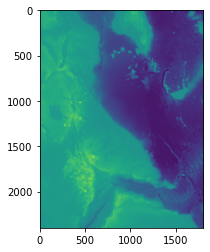

In [21]:
plt.imshow(np.flipud(ETOPO1))

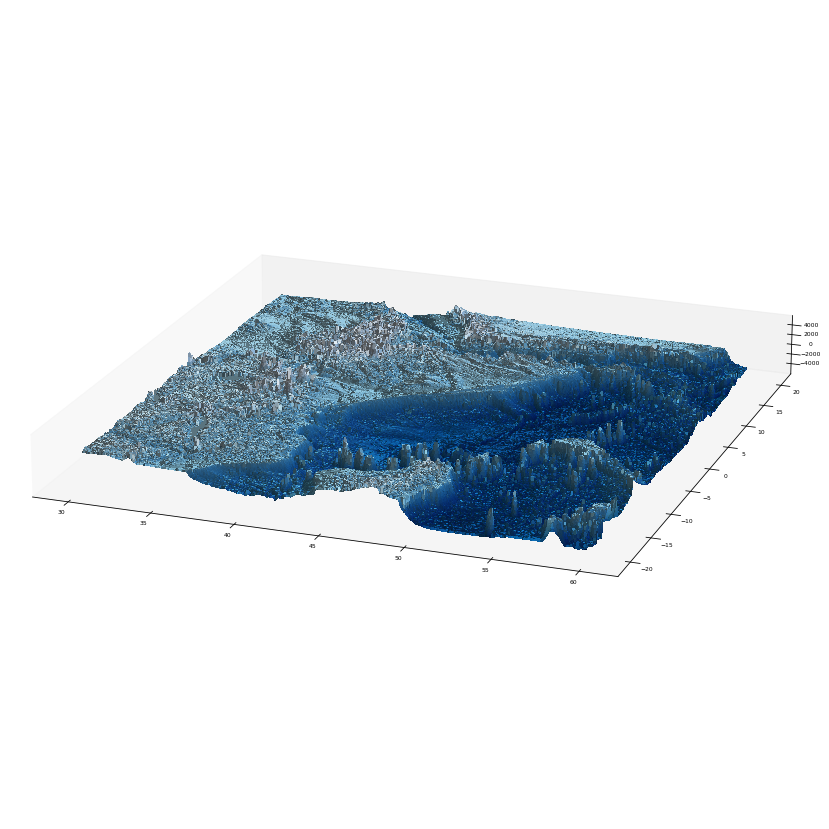

In [29]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt


url = 'http://141.89.112.21/wp-content/uploads/2021/11/etopo1_data_python.txt'
ETOPO1 = np.loadtxt(np.DataSource().open(url), skiprows=5)

h, w = ETOPO1.shape
lon = np.linspace( 30,  60, w)  # linspace recommended for non-integer intervals.
lat = np.linspace( 20, -20, h)  # Reverse this instead of flipping the array.
LON, LAT = np.meshgrid(lon, lat)

fig, ax = plt.subplots(figsize=(20, 15),
                       subplot_kw={"projection": "3d"},
                      )

ve = 200  # Approx. vertical exaggeration.
ax.set_box_aspect((1, 1, ve/1850))

rgb = LightSource(270, 45).shade(ETOPO1,
                                 cmap=cm.Blues_r,
                                 blend_mode='soft',
                                 vert_exag=ve/1850
                                )

ax.plot_surface(LON, LAT, ETOPO1,
                rstride=2, cstride=2,
                facecolors=rgb,
                antialiased=False,
               )

ax.view_init(20, -70)
ax.tick_params(axis='both', labelsize=6)
ax.grid(False)
plt.show()